# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
research_data = pd.merge(study_results, mouse_metadata)

# Display the data table for preview
research_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [27]:
# Checking the number of mice.
print(f"The total number of mice are {research_data['Mouse ID'].nunique()}")


The total number of mice are 249


In [35]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = research_data.loc[research_data.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [38]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_information = research_data.loc[research_data["Mouse ID"] == "g989"]
duplicate_mice_information

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [50]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
cleaned_data= research_data.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep = False)
cleaned_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [52]:
# Checking the number of mice in the clean DataFrame.
print(f"The total number of mice are {cleaned_data['Mouse ID'].nunique()}")

The total number of mice are 249


## Summary Statistics

In [53]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_data = cleaned_data['Tumor Volume (mm3)'].groupby(cleaned_data['Drug Regimen']).mean()
median_data = cleaned_data['Tumor Volume (mm3)'].groupby(cleaned_data['Drug Regimen']).median()
variance_data = cleaned_data['Tumor Volume (mm3)'].groupby(cleaned_data['Drug Regimen']).var()
standard_data = cleaned_data['Tumor Volume (mm3)'].groupby(cleaned_data['Drug Regimen']).std()
sem_data = cleaned_data['Tumor Volume (mm3)'].groupby(cleaned_data['Drug Regimen']).sem()

summary_data = pd.DataFrame({"Mean Tumor Volume":mean_data, 
                            "Median Tumor Volume":median_data, 
                            "Tumor Volume Variance":variance_data, 
                            "Tumor Volume Std. Dev.":standard_data, 
                            "Tumor Volume Std. Err.":sem_data})
summary_data

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [58]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_aggregate =  cleaned_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_aggregate

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.458254  50.854632  44.053659  6.637293  0.540135
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

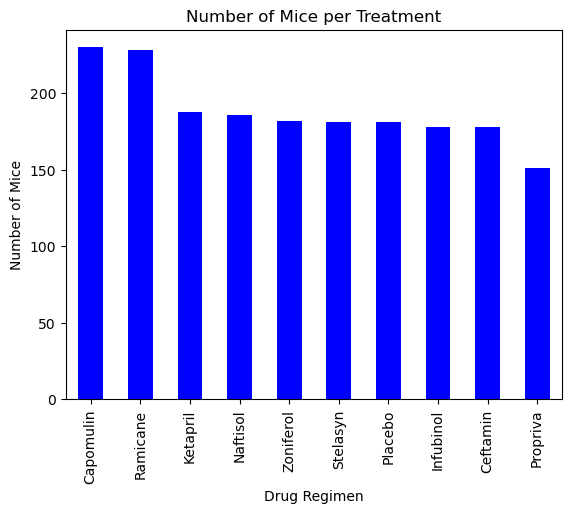

In [60]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count = cleaned_data["Drug Regimen"].value_counts()
plot_bar_graph = mice_count.plot.bar(color='b')  
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")
plt.show()

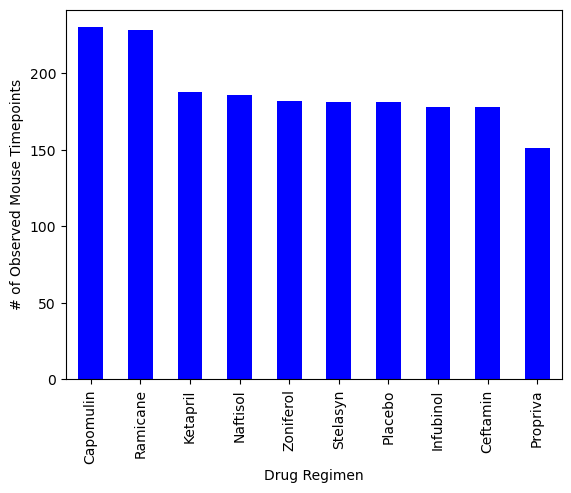

In [61]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
mice_count = cleaned_data["Drug Regimen"].value_counts()
plot_bar_graph = mice_count.plot.bar(color='b')  
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

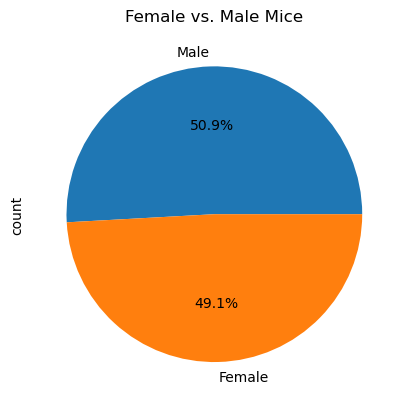

In [62]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = cleaned_data["Sex"].value_counts()
plt.title("Female vs. Male Mice")
gender_data.plot.pie(autopct= "%1.1f%%")
plt.show()

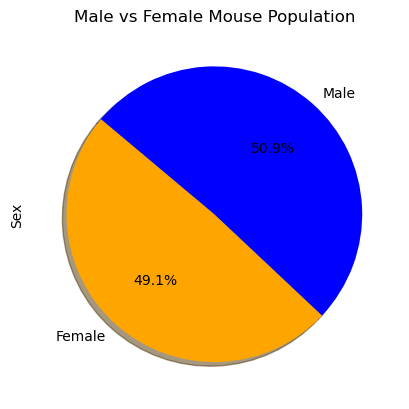

In [67]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [49.1, 50.9]
colors = ['orange', 'blue']
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [73]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_data = cleaned_data.loc[cleaned_data["Drug Regimen"] == "Capomulin"]
Ramicane_data = cleaned_data.loc[cleaned_data["Drug Regimen"] == "Ramicane"]
Infubinol_data = cleaned_data.loc[cleaned_data["Drug Regimen"] == "Infubinol"]
Ceftamin_data = cleaned_data.loc[cleaned_data["Drug Regimen"] == "Ceftamin"]
# Start by getting the last (greatest) timepoint for each mouse
Capomulin_last = Capomulin_data.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, cleaned_data, on=("Mouse ID","Timepoint"))

Ramicane_last = Ramicane_data.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, cleaned_data, on=("Mouse ID","Timepoint"))

Infubinol_last = Infubinol_data.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, cleaned_data, on=("Mouse ID","Timepoint"))

Ceftamin_last = Ceftamin_data.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, cleaned_data, on=("Mouse ID","Timepoint"))

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Capomulin_merge.head()
Ramicane_merge.head()
Infubinol_merge.head()
Ceftamin_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a411,45,38.407618,1,Ramicane,Male,3,22
1,a444,45,43.047543,0,Ramicane,Female,10,25
2,a520,45,38.810366,1,Ramicane,Male,13,21
3,a644,45,32.978522,1,Ramicane,Female,7,17
4,c458,30,38.342008,2,Ramicane,Female,23,20


In [78]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)

Capomulin_tumor = Capomulin_merge["Tumor Volume (mm3)"]
Ramicane_tumor = Ramicane_merge["Tumor Volume (mm3)"]
Infubinol_tumor = Infubinol_merge["Tumor Volume (mm3)"]
Ceftamin_tumor = Ceftamin_merge["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles_Capomulin = Capomulin_tumor.quantile([0.25, 0.5, 0.75])
quartiles_Ramicane = Ramicane_tumor.quantile([0.25, 0.5, 0.75])
quartiles_Infubinol = Infubinol_tumor.quantile([0.25, 0.5, 0.75])
quartiles_Ceftamin = Ceftamin_tumor.quantile([0.25, 0.5, 0.75])

lowerq_Cap = quartiles_Capomulin[0.25]
upperq_Cap = quartiles_Capomulin[0.75]
iqr_Cap = upperq_Cap-lowerq_Cap

lowerq_Ram = quartiles_Ramicane[0.25]
upperq_Ram = quartiles_Ramicane[0.75]
iqr_Ram = upperq_Ram-lowerq_Ram

lowerq_Inf = quartiles_Infubinol[0.25]
upperq_Inf = quartiles_Infubinol[0.75]
iqr_Inf = upperq_Inf-lowerq_Inf

lowerq_Cef = quartiles_Ceftamin[0.25]
upperq_Cef = quartiles_Ceftamin[0.75]
iqr_Cef = upperq_Cef-lowerq_Cef

lowerq_Cap = quartiles_Capomulin[0.25]
upperq_Cap = quartiles_Capomulin[0.75]
iqr_Cap = upperq_Cap-lowerq_Cap

lowerq_Ram = quartiles_Ramicane[0.25]
upperq_Ram = quartiles_Ramicane[0.75]
iqr_Ram = upperq_Ram-lowerq_Ram

lowerq_Inf = quartiles_Infubinol[0.25]
upperq_Inf = quartiles_Infubinol[0.75]
iqr_Inf = upperq_Inf-lowerq_Inf

lowerq_Cef = quartiles_Ceftamin[0.25]
upperq_Cef = quartiles_Ceftamin[0.75]
iqr_Cef = upperq_Cef-lowerq_Cef

lower_bound_Cap = lowerq_Cap - (1.5*iqr)
upper_bound_Cap = upperq_Cap + (1.5*iqr)

lower_bound_Ram = lowerq_Ram - (1.5*iqr)
upper_bound_Ram = upperq_Ram + (1.5*iqr)

lower_bound_Inf = lowerq_Inf - (1.5*iqr)
upper_bound_Inf = upperq_Inf + (1.5*iqr)

lower_bound_Cef = lowerq_Cef - (1.5*iqr)
upper_bound_Cef = upperq_Cef + (1.5*iqr)

print(f"Values below for Capomulin {lower_bound_Cap} could be outliers.")
print(f"Values above for Capomulin {upper_bound_Cap} could be outliers.")

print(f"Values below for Ceftamin {lower_bound_Cef} could be outliers.")
print(f"Values above for Ceftamin {upper_bound_Cef} could be outliers.")

print(f"Values below for Infubinol {lower_bound_Inf} could be outliers.")
print(f"Values above for Infubinol {upper_bound_Inf} could be outliers.")

print(f"Values below for Ramicane {lower_bound_Ram} could be outliers.")
print(f"Values above for Ramicane {upper_bound_Ram} could be outliers.")

Values below for Capomulin 20.70456164999999 could be outliers.
Values above for Capomulin 51.83201549 could be outliers.
Values below for Ceftamin 37.04928265999999 could be outliers.
Values above for Ceftamin 75.97262522 could be outliers.
Values below for Infubinol 42.375812499999995 could be outliers.
Values above for Infubinol 77.19853804 could be outliers.
Values below for Ramicane 19.887674359999995 could be outliers.
Values above for Ramicane 52.33180146000001 could be outliers.


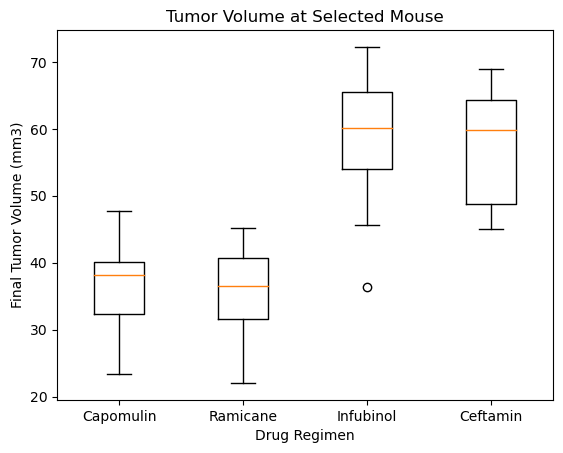

In [85]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
Box_plot = [Capomulin_tumor, Ramicane_tumor, Infubinol_tumor, Ceftamin_tumor]
Regimen = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume at Selected Mouse')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(Box_plot, labels=Regimen, widths = 0.4, vert=True)
plt.show()

## Line and Scatter Plots

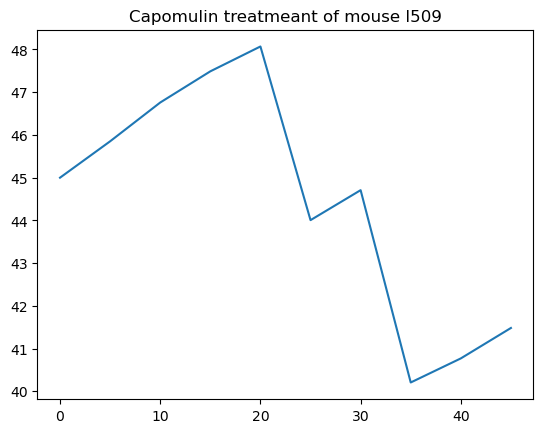

In [90]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Line_plot = Capomulin_data.loc[Capomulin_data["Mouse ID"] == "l509"]
x_axis = Line_plot["Timepoint"]
y_axis = Line_plot["Tumor Volume (mm3)"]
fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, y_axis)
plt.show()

In [103]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
scatter_plot = Capomulin_data.groupby(['Mouse ID']).mean()
plt.scatter(scatter_plot['Weight (g)'], scatter_plot['Tumor Volume (mm3)'], color="blue")
fig1, ax1 = plt.subplots()
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

TypeError: Could not convert CapomulinCapomulinCapomulinCapomulinCapomulinCapomulinCapomulinCapomulinCapomulinCapomulin to numeric

## Correlation and Regression

In [108]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


NameError: name 'scatter_plot' is not defined